## Direct Optimization

### Load data

In [1]:
import data
import torch
from models import imagebind_model
from models.imagebind_model import ModalityType
import matplotlib.pyplot as plt
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# input_type = int(input('1 - audio\n2 - image\n3 - text'))
# file_path = input('File path/text prompt: ')
input_type = 2
file_path = '/home/alberto/ImageBind/.assets/bird_image.jpg'
print(input_type)
print(file_path)

/home/alberto/anaconda3/envs/imgbind/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alberto/anaconda3/envs/imgbind/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/alberto/anaconda3/envs/imgbind/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


2
/home/alberto/ImageBind/.assets/bird_image.jpg


### Get Imagebind Embeddings

In [2]:

# Initialize model
model = imagebind_model.imagebind_huge(pretrained=True)
model.to(device)

# Load data
if input_type == 1:
    mod = ModalityType.AUDIO

    inputs = {
        mod: data.load_and_transform_audio_data([file_path], device)
    }

elif input_type == 2:
    mod = ModalityType.VISION
    inputs = {
        mod: data.load_and_transform_vision_data([file_path], device)
    }
    
else:
    mod = ModalityType.TEXT
    inputs = {
        mod: data.load_and_transform_text(file_path, device)
    }

with torch.no_grad():
    target_embedding = model(inputs)[mod]

og_image = inputs[mod]

print(target_embedding)
print(target_embedding.size())

tensor([[ 0.0187,  0.0058,  0.0546,  ...,  0.0043,  0.0096, -0.0093]],
       device='cuda:0')
torch.Size([1, 1024])


In [3]:
import torchvision

class NormalizeInverse(torchvision.transforms.Normalize):
    """
    Undoes the normalization and returns the reconstructed images in the input domain.
    """

    def __init__(self, mean, std):
        mean = torch.as_tensor(mean)
        std = torch.as_tensor(std)
        std_inv = 1 / (std + 1e-7)
        mean_inv = -mean * std_inv
        super().__init__(mean=mean_inv, std=std_inv)

    def __call__(self, tensor):
        return super().__call__(tensor.clone())

denorm = NormalizeInverse(mean=(0.48145466, 0.4578275, 0.40821073),
                          std=(0.26862954, 0.26130258, 0.27577711))

### Generate random Image

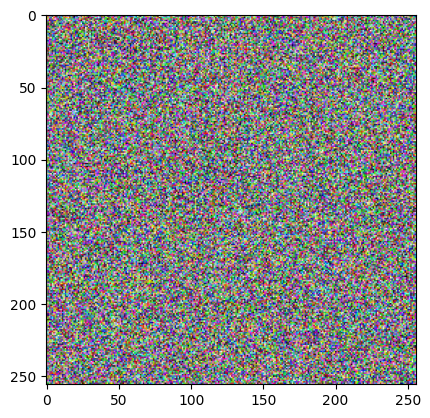

In [4]:
from torchvision import transforms
from PIL import Image

data_transform = transforms.Compose(
    [   
        transforms.Resize(224, interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=(0.48145466, 0.4578275, 0.40821073),
            std=(0.26862954, 0.26130258, 0.27577711)),
    ]
)

imarray = np.random.rand(256,256,3) * 255
image = Image.fromarray(imarray.astype('uint8')).convert('RGB')

plt.imshow(image)
plt.show()

image = data_transform(image).to(device)
image = image.unsqueeze(0)


### Optimize image to get same latent

  0%|          | 3/100000 [00:00<3:10:16,  8.76it/s]

Current loss: 2.9771387577056885
VGG loss: 0.18296575546264648
L1 loss: 0.027941729873418808


  1%|          | 1000/100000 [01:58<3:15:55,  8.42it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


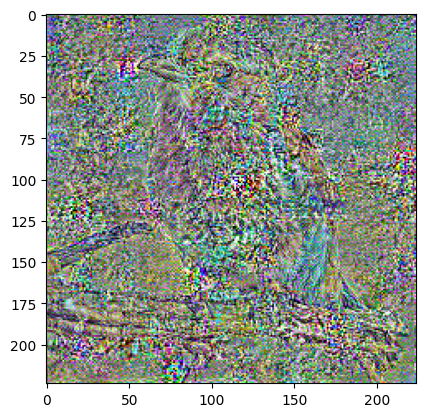

  1%|          | 1003/100000 [01:59<3:44:02,  7.36it/s]

Current loss: 0.19500906765460968
VGG loss: 0.14040641486644745
L1 loss: 0.0005460265092551708


  2%|▏         | 2003/100000 [03:58<3:09:11,  8.63it/s]

Current loss: 0.027521079406142235
VGG loss: 0.2572881877422333
L1 loss: 0.000275210797553882


  3%|▎         | 3003/100000 [05:56<3:04:43,  8.75it/s]

Current loss: 0.023630214855074883
VGG loss: 0.28960201144218445
L1 loss: 0.00023630214855074883


  4%|▍         | 4003/100000 [07:55<3:05:57,  8.60it/s]

Current loss: 0.021943101659417152
VGG loss: 0.3214218020439148
L1 loss: 0.000219431021832861


  5%|▌         | 5003/100000 [09:55<3:03:36,  8.62it/s]

Current loss: 0.016216091811656952
VGG loss: 0.3545794188976288
L1 loss: 0.00016216091171372682


  6%|▌         | 6003/100000 [11:46<2:42:11,  9.66it/s]

Current loss: 0.01616162806749344
VGG loss: 0.3892679810523987
L1 loss: 0.00016161627718247473


  7%|▋         | 7003/100000 [13:33<2:40:51,  9.64it/s]

Current loss: 0.016855845227837563
VGG loss: 0.42392078042030334
L1 loss: 0.0001685584575170651


  8%|▊         | 8003/100000 [15:20<2:38:52,  9.65it/s]

Current loss: 0.014738802798092365
VGG loss: 0.45810988545417786
L1 loss: 0.00014738802565261722


  9%|▉         | 9003/100000 [17:06<2:37:30,  9.63it/s]

Current loss: 0.012787532992661
VGG loss: 0.49145716428756714
L1 loss: 0.00012787533341906965


 10%|█         | 10003/100000 [18:53<2:35:33,  9.64it/s]

Current loss: 0.01246020570397377
VGG loss: 0.524217963218689
L1 loss: 0.00012460205471143126


 11%|█         | 11003/100000 [20:40<2:33:57,  9.63it/s]

Current loss: 0.012978145852684975
VGG loss: 0.5560398101806641
L1 loss: 0.00012978145969100296


 12%|█▏        | 12003/100000 [22:27<2:31:48,  9.66it/s]

Current loss: 0.012550774961709976
VGG loss: 0.5867787599563599
L1 loss: 0.0001255077513633296


 13%|█▎        | 13003/100000 [24:14<2:30:16,  9.65it/s]

Current loss: 0.009861553087830544
VGG loss: 0.6169922947883606
L1 loss: 9.86155282589607e-05


 14%|█▍        | 14003/100000 [26:01<2:28:50,  9.63it/s]

Current loss: 0.011495289392769337
VGG loss: 0.6459170579910278
L1 loss: 0.00011495289800222963


 15%|█▌        | 15003/100000 [27:47<2:27:10,  9.63it/s]

Current loss: 0.009369853883981705
VGG loss: 0.6743868589401245
L1 loss: 9.369853796670213e-05


 16%|█▌        | 16003/100000 [29:34<2:25:05,  9.65it/s]

Current loss: 0.009475297294557095
VGG loss: 0.7013217806816101
L1 loss: 9.475297702010721e-05


 17%|█▋        | 17003/100000 [31:21<2:23:35,  9.63it/s]

Current loss: 0.008689673617482185
VGG loss: 0.7278675436973572
L1 loss: 8.68967326823622e-05


 18%|█▊        | 18003/100000 [33:08<2:21:44,  9.64it/s]

Current loss: 0.008020446635782719
VGG loss: 0.753705620765686
L1 loss: 8.02044669399038e-05


 19%|█▉        | 19003/100000 [34:54<2:20:02,  9.64it/s]

Current loss: 0.008173387497663498
VGG loss: 0.778813362121582
L1 loss: 8.173387323040515e-05


 20%|██        | 20003/100000 [36:41<2:18:26,  9.63it/s]

Current loss: 0.008043868467211723
VGG loss: 0.8030558228492737
L1 loss: 8.043868729146197e-05


 21%|██        | 21003/100000 [38:28<2:16:37,  9.64it/s]

Current loss: 0.008127289824187756
VGG loss: 0.826956570148468
L1 loss: 8.127289765980095e-05


 22%|██▏       | 22003/100000 [40:15<2:14:44,  9.65it/s]

Current loss: 0.007952462881803513
VGG loss: 0.8501681685447693
L1 loss: 7.952463056426495e-05


 23%|██▎       | 23003/100000 [42:02<2:13:06,  9.64it/s]

Current loss: 0.006998937111347914
VGG loss: 0.8725327849388123
L1 loss: 6.998937169555575e-05


 24%|██▍       | 24003/100000 [43:49<2:11:30,  9.63it/s]

Current loss: 0.007232791744172573
VGG loss: 0.8945809602737427
L1 loss: 7.23279154044576e-05


 25%|██▌       | 25003/100000 [45:35<2:09:45,  9.63it/s]

Current loss: 0.006771685089915991
VGG loss: 0.9162058234214783
L1 loss: 6.7716850026045e-05


 26%|██▌       | 26003/100000 [47:22<2:08:02,  9.63it/s]

Current loss: 0.007084711920469999
VGG loss: 0.9372901320457458
L1 loss: 7.08471197867766e-05


 27%|██▋       | 27003/100000 [49:09<2:06:21,  9.63it/s]

Current loss: 0.006666417233645916
VGG loss: 0.9581242799758911
L1 loss: 6.666417175438255e-05


 28%|██▊       | 28003/100000 [50:56<2:05:13,  9.58it/s]

Current loss: 0.007494105491787195
VGG loss: 0.9783255457878113
L1 loss: 7.494105375371873e-05


 29%|██▉       | 29003/100000 [52:43<2:02:44,  9.64it/s]

Current loss: 0.006767225451767445
VGG loss: 0.9984381198883057
L1 loss: 6.767225568182766e-05


 30%|███       | 30003/100000 [54:30<2:01:03,  9.64it/s]

Current loss: 0.0058849467895925045
VGG loss: 1.017792820930481
L1 loss: 5.884946585865691e-05


 31%|███       | 31003/100000 [56:17<1:59:10,  9.65it/s]

Current loss: 0.005910576321184635
VGG loss: 1.0368598699569702
L1 loss: 5.910576510359533e-05


 32%|███▏      | 32003/100000 [58:04<1:57:30,  9.64it/s]

Current loss: 0.006350073032081127
VGG loss: 1.0555037260055542
L1 loss: 6.350073090288788e-05


 33%|███▎      | 33003/100000 [59:51<1:55:56,  9.63it/s]

Current loss: 0.006310711614787579
VGG loss: 1.0738635063171387
L1 loss: 6.310711614787579e-05


 34%|███▍      | 34003/100000 [1:01:37<1:54:07,  9.64it/s]

Current loss: 0.00607609748840332
VGG loss: 1.0919657945632935
L1 loss: 6.076097270124592e-05


 35%|███▌      | 35003/100000 [1:03:24<1:52:34,  9.62it/s]

Current loss: 0.005922192707657814
VGG loss: 1.1098426580429077
L1 loss: 5.922192940488458e-05


 36%|███▌      | 36003/100000 [1:05:11<1:50:28,  9.66it/s]

Current loss: 0.006090872921049595
VGG loss: 1.127510905265808
L1 loss: 6.090872921049595e-05


 37%|███▋      | 37003/100000 [1:06:58<1:48:57,  9.64it/s]

Current loss: 0.006408749148249626
VGG loss: 1.14478600025177
L1 loss: 6.408749322872609e-05


 38%|███▊      | 38003/100000 [1:08:45<1:47:09,  9.64it/s]

Current loss: 0.00521580595523119
VGG loss: 1.1618447303771973
L1 loss: 5.2158058679196984e-05


 39%|███▉      | 39003/100000 [1:10:33<1:45:29,  9.64it/s]

Current loss: 0.005274578928947449
VGG loss: 1.178703784942627
L1 loss: 5.274578870739788e-05


 40%|████      | 40003/100000 [1:12:21<1:43:44,  9.64it/s]

Current loss: 0.00558899249881506
VGG loss: 1.1956167221069336
L1 loss: 5.588992280536331e-05


 41%|████      | 41003/100000 [1:14:07<1:42:14,  9.62it/s]

Current loss: 0.005161158740520477
VGG loss: 1.2120063304901123
L1 loss: 5.1611586968647316e-05


 42%|████▏     | 42003/100000 [1:15:54<1:40:27,  9.62it/s]

Current loss: 0.005638677626848221
VGG loss: 1.2280926704406738
L1 loss: 5.6386776122963056e-05


 43%|████▎     | 43003/100000 [1:17:41<1:38:29,  9.64it/s]

Current loss: 0.004802049603313208
VGG loss: 1.2439466714859009
L1 loss: 4.802049807040021e-05


 44%|████▍     | 44003/100000 [1:19:28<1:37:03,  9.62it/s]

Current loss: 0.004565735813230276
VGG loss: 1.2597265243530273
L1 loss: 4.565735798678361e-05


 45%|████▌     | 45003/100000 [1:21:15<1:35:30,  9.60it/s]

Current loss: 0.005302474834024906
VGG loss: 1.275331974029541
L1 loss: 5.302474892232567e-05


 46%|████▌     | 46003/100000 [1:23:02<1:33:35,  9.62it/s]

Current loss: 0.0046651591546833515
VGG loss: 1.2908138036727905
L1 loss: 4.6651592128910124e-05


 47%|████▋     | 47003/100000 [1:24:49<1:31:42,  9.63it/s]

Current loss: 0.004719062242656946
VGG loss: 1.3060400485992432
L1 loss: 4.719062417279929e-05


 48%|████▊     | 48003/100000 [1:26:36<1:29:59,  9.63it/s]

Current loss: 0.00467634666711092
VGG loss: 1.3213428258895874
L1 loss: 4.676346725318581e-05


 49%|████▉     | 49003/100000 [1:28:23<1:28:25,  9.61it/s]

Current loss: 0.00554451672360301
VGG loss: 1.3360227346420288
L1 loss: 5.544516534428112e-05


 50%|█████     | 50003/100000 [1:30:10<1:26:24,  9.64it/s]

Current loss: 0.004633419215679169
VGG loss: 1.3507822751998901
L1 loss: 4.63341930299066e-05


 51%|█████     | 51003/100000 [1:31:56<1:24:52,  9.62it/s]

Current loss: 0.005028176587074995
VGG loss: 1.3653277158737183
L1 loss: 5.028176383348182e-05


 52%|█████▏    | 52003/100000 [1:33:43<1:23:18,  9.60it/s]

Current loss: 0.004669682122766972
VGG loss: 1.3799902200698853
L1 loss: 4.6696823119418696e-05


 53%|█████▎    | 53003/100000 [1:35:30<1:21:34,  9.60it/s]

Current loss: 0.0046660685911774635
VGG loss: 1.3941998481750488
L1 loss: 4.6660687075927854e-05


 54%|█████▍    | 54003/100000 [1:37:17<1:19:29,  9.64it/s]

Current loss: 0.0046719834208488464
VGG loss: 1.4083982706069946
L1 loss: 4.671983333537355e-05


 55%|█████▌    | 55003/100000 [1:39:04<1:18:01,  9.61it/s]

Current loss: 0.0045024799183011055
VGG loss: 1.4224681854248047
L1 loss: 4.502479714574292e-05


 56%|█████▌    | 56003/100000 [1:40:51<1:16:15,  9.62it/s]

Current loss: 0.004296582657843828
VGG loss: 1.4363054037094116
L1 loss: 4.2965824832208455e-05


 57%|█████▋    | 57003/100000 [1:42:38<1:14:32,  9.61it/s]

Current loss: 0.0043728710152208805
VGG loss: 1.4499781131744385
L1 loss: 4.372870898805559e-05


 58%|█████▊    | 58003/100000 [1:44:25<1:12:41,  9.63it/s]

Current loss: 0.004809400532394648
VGG loss: 1.4636805057525635
L1 loss: 4.80940070701763e-05


 59%|█████▉    | 59003/100000 [1:46:12<1:10:50,  9.64it/s]

Current loss: 0.003727003000676632
VGG loss: 1.47732412815094
L1 loss: 3.727003058884293e-05


 60%|██████    | 60003/100000 [1:47:59<1:09:18,  9.62it/s]

Current loss: 0.0041258810088038445
VGG loss: 1.4906566143035889
L1 loss: 4.125881241634488e-05


 61%|██████    | 61003/100000 [1:49:46<1:07:29,  9.63it/s]

Current loss: 0.004837199579924345
VGG loss: 1.5038806200027466
L1 loss: 4.83719959447626e-05


 62%|██████▏   | 62003/100000 [1:51:33<1:05:42,  9.64it/s]

Current loss: 0.004168439190834761
VGG loss: 1.51692795753479
L1 loss: 4.168439409113489e-05


 63%|██████▎   | 63003/100000 [1:53:19<1:04:00,  9.63it/s]

Current loss: 0.004030941054224968
VGG loss: 1.5299378633499146
L1 loss: 4.030940908705816e-05


 64%|██████▍   | 64003/100000 [1:55:06<1:02:18,  9.63it/s]

Current loss: 0.00412396527826786
VGG loss: 1.543020248413086
L1 loss: 4.1239654819946736e-05


 65%|██████▌   | 65003/100000 [1:56:53<1:00:38,  9.62it/s]

Current loss: 0.0037283150013536215
VGG loss: 1.5559237003326416
L1 loss: 3.72831491404213e-05


 66%|██████▌   | 66003/100000 [1:58:40<58:57,  9.61it/s]  

Current loss: 0.00490327225998044
VGG loss: 1.5686062574386597
L1 loss: 4.903272201772779e-05


 67%|██████▋   | 67003/100000 [2:00:27<57:03,  9.64it/s]  

Current loss: 0.0036850643809884787
VGG loss: 1.58118736743927
L1 loss: 3.6850644391961396e-05


 68%|██████▊   | 68003/100000 [2:02:14<55:21,  9.63it/s]  

Current loss: 0.004181892145425081
VGG loss: 1.593750238418579
L1 loss: 4.1818922909442335e-05


 69%|██████▉   | 69003/100000 [2:04:01<53:35,  9.64it/s]  

Current loss: 0.0035342578776180744
VGG loss: 1.6063330173492432
L1 loss: 3.534257848514244e-05


 70%|███████   | 70003/100000 [2:05:48<51:54,  9.63it/s]  

Current loss: 0.0039734854362905025
VGG loss: 1.61849045753479
L1 loss: 3.973485218011774e-05


 71%|███████   | 71003/100000 [2:07:35<50:06,  9.65it/s]

Current loss: 0.004468083381652832
VGG loss: 1.6307309865951538
L1 loss: 4.4680833525490016e-05


 72%|███████▏  | 72003/100000 [2:09:22<48:21,  9.65it/s]

Current loss: 0.0035790682304650545
VGG loss: 1.642903208732605
L1 loss: 3.5790682886727154e-05


 73%|███████▎  | 73003/100000 [2:11:09<46:42,  9.63it/s]

Current loss: 0.003588983556255698
VGG loss: 1.6549737453460693
L1 loss: 3.588983599911444e-05


 74%|███████▍  | 74003/100000 [2:12:55<44:58,  9.63it/s]

Current loss: 0.0037398110143840313
VGG loss: 1.6669949293136597
L1 loss: 3.73981092707254e-05


 75%|███████▌  | 75003/100000 [2:14:42<43:20,  9.61it/s]

Current loss: 0.0035472118761390448
VGG loss: 1.6787314414978027
L1 loss: 3.547211963450536e-05


 76%|███████▌  | 76003/100000 [2:16:29<41:32,  9.63it/s]

Current loss: 0.003596747061237693
VGG loss: 1.6905120611190796
L1 loss: 3.5967470466857776e-05


 77%|███████▋  | 77003/100000 [2:18:16<39:50,  9.62it/s]

Current loss: 0.0035947964061051607
VGG loss: 1.7022459506988525
L1 loss: 3.594796362449415e-05


 78%|███████▊  | 78003/100000 [2:20:03<38:08,  9.61it/s]

Current loss: 0.0034761454444378614
VGG loss: 1.7138592004776
L1 loss: 3.4761455026455224e-05


 79%|███████▉  | 79003/100000 [2:21:50<36:23,  9.62it/s]

Current loss: 0.003698461689054966
VGG loss: 1.7254743576049805
L1 loss: 3.6984616599511355e-05


 80%|████████  | 80003/100000 [2:23:37<34:32,  9.65it/s]

Current loss: 0.003855052636936307
VGG loss: 1.736814022064209
L1 loss: 3.855052636936307e-05


 81%|████████  | 81003/100000 [2:25:24<32:51,  9.64it/s]

Current loss: 0.0038040955550968647
VGG loss: 1.7483203411102295
L1 loss: 3.804095467785373e-05


 82%|████████▏ | 82003/100000 [2:27:11<31:11,  9.61it/s]

Current loss: 0.003573092631995678
VGG loss: 1.759621024131775
L1 loss: 3.5730925446841866e-05


 83%|████████▎ | 83003/100000 [2:28:58<29:20,  9.65it/s]

Current loss: 0.0036802724935114384
VGG loss: 1.7709801197052002
L1 loss: 3.6802724935114384e-05


 84%|████████▍ | 84003/100000 [2:30:44<27:41,  9.63it/s]

Current loss: 0.0038390369154512882
VGG loss: 1.7820992469787598
L1 loss: 3.8390367990359664e-05


 85%|████████▌ | 85003/100000 [2:32:31<25:57,  9.63it/s]

Current loss: 0.0035035875625908375
VGG loss: 1.7931021451950073
L1 loss: 3.5035875043831766e-05


 86%|████████▌ | 86003/100000 [2:34:18<24:16,  9.61it/s]

Current loss: 0.003208748996257782
VGG loss: 1.8040963411331177
L1 loss: 3.2087489671539515e-05


 87%|████████▋ | 87003/100000 [2:36:05<22:28,  9.64it/s]

Current loss: 0.0032335547730326653
VGG loss: 1.8149539232254028
L1 loss: 3.233554889447987e-05


 88%|████████▊ | 88003/100000 [2:37:52<20:46,  9.63it/s]

Current loss: 0.003208954818546772
VGG loss: 1.8258211612701416
L1 loss: 3.208954876754433e-05


 89%|████████▉ | 89003/100000 [2:39:39<19:03,  9.62it/s]

Current loss: 0.003486973699182272
VGG loss: 1.836644172668457
L1 loss: 3.48697358276695e-05


 90%|█████████ | 90003/100000 [2:41:26<17:16,  9.64it/s]

Current loss: 0.0036612090189009905
VGG loss: 1.8474400043487549
L1 loss: 3.661209120764397e-05


 91%|█████████ | 91003/100000 [2:43:13<15:35,  9.62it/s]

Current loss: 0.0036866734735667706
VGG loss: 1.8580617904663086
L1 loss: 3.686673517222516e-05


 92%|█████████▏| 92003/100000 [2:45:00<13:50,  9.63it/s]

Current loss: 0.003289734711870551
VGG loss: 1.8686784505844116
L1 loss: 3.2897347409743816e-05


 93%|█████████▎| 93003/100000 [2:46:47<12:05,  9.64it/s]

Current loss: 0.0034466320648789406
VGG loss: 1.8791950941085815
L1 loss: 3.44663203577511e-05


 94%|█████████▍| 94003/100000 [2:48:34<10:24,  9.61it/s]

Current loss: 0.0032661431469023228
VGG loss: 1.8897932767868042
L1 loss: 3.266143176006153e-05


 95%|█████████▌| 95003/100000 [2:50:21<08:38,  9.63it/s]

Current loss: 0.0034559648483991623
VGG loss: 1.9002424478530884
L1 loss: 3.455964906606823e-05


 96%|█████████▌| 96003/100000 [2:52:08<06:53,  9.66it/s]

Current loss: 0.0034170644357800484
VGG loss: 1.9105660915374756
L1 loss: 3.417064363020472e-05


 97%|█████████▋| 97003/100000 [2:53:55<05:10,  9.64it/s]

Current loss: 0.0029467667918652296
VGG loss: 1.9209342002868652
L1 loss: 2.9467668355209753e-05


 98%|█████████▊| 98003/100000 [2:55:42<03:27,  9.62it/s]

Current loss: 0.002992281224578619
VGG loss: 1.931134819984436
L1 loss: 2.992281224578619e-05


 99%|█████████▉| 99003/100000 [2:57:29<01:43,  9.62it/s]

Current loss: 0.003331123385578394
VGG loss: 1.9414106607437134
L1 loss: 3.3311232982669026e-05


100%|██████████| 100000/100000 [2:59:15<00:00,  9.30it/s]


In [5]:
from tqdm import tqdm
from torch.nn import L1Loss
from perceptual_loss_vgg import PerceptualLossVGG
from torch.autograd import Variable

# Optimizer
n_steps = 100000
image = Variable(image, requires_grad=True)
optimizer = torch.optim.Adam([image], lr=0.1)
loss_fn = L1Loss()
loss_vgg = PerceptualLossVGG(layers_weights=[1.0/32,1.0/16,1.0/8,1.0/4,1.0]).to(device)

l1_weight = 100
vgg_weight = 1
realism_weight = 0

for i in tqdm(range(n_steps)):
    optimizer.zero_grad()

    inputs = {
        ModalityType.VISION: image
    }
    
    emb = model(inputs)[ModalityType.VISION]

    l1 = loss_fn(emb, target_embedding)
    vgg = loss_vgg(image, og_image)
    loss = l1_weight * l1 + vgg_weight * vgg 
    loss.backward()

    # Adjust learning weights
    optimizer.step()
    if i == 1000:
        vgg_weight = 0
        # Denormalized image
        img = denorm(image[0]).permute(1,2,0).cpu().detach().numpy()
        plt.imshow(img)
        plt.show()
        
    if i % 1000 == 0:
        print('Current loss: {}'.format(loss))
        print('VGG loss: {}'.format(vgg))
        print('L1 loss: {}'.format(l1))

### Plot generated Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


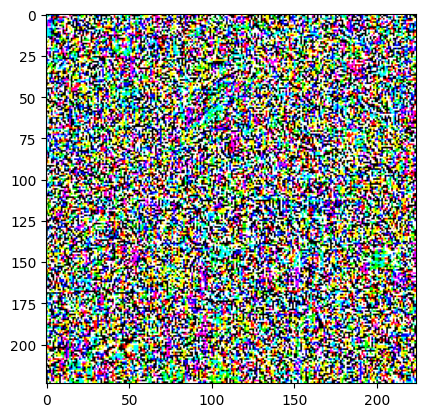

In [7]:
# Denormalized image
img = denorm(image[0]).permute(1,2,0).cpu().detach().numpy()
plt.imshow(img)
plt.show()